## Libraries

In [45]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Date and time
import datetime
import calendar

# Math and location
import math
import geopandas as gpd
import country_converter as coco

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from scipy.optimize import minimize

## 1. Import Files

In [3]:
searches_file = ('data/searches.tsv')
searches = pd.read_csv(searches_file, sep="\t")
contacts_file = ("data/contacts.tsv")
contacts = pd.read_csv(contacts_file, sep='\t')

# Cleaned up file in Alteryx Designer
searches_file_v2 = ("data/searches_v2.tsv")
searches_v2 = pd.read_csv(searches_file_v2, sep='\t')
contacts_file_v2 = ("data/contacts_v2.tsv")
contacts_v2 = pd.read_csv(contacts_file_v2, sep='\t')

# Merged searches and contacts based on id_user = id_guest
# Done in Alteryx Designer
searches_contacts_file = ("data/searches_contacts_joined.tsv")
searches_contacts = pd.read_csv(searches_contacts_file, sep='\t')

searches

,ds,id_user,ds_checkin,ds_checkout,n_searches,n_nights,n_guests_min,n_guests_max,origin_country,filter_price_min,filter_price_max,filter_room_types,filter_neighborhoods
0,2014-10-01,0000af0a-6f26-4233-9832-27efbfb36148,2014-10-09,2014-10-12,16,3.0,2,2,IE,0.0,6.700000e+01,",Entire home/apt,Entire home/apt,Private room,...",NaN
1,2014-10-01,0000af0a-6f26-4233-9832-27efbfb36148,2014-10-09,2014-10-19,3,10.0,1,2,IE,0.0,6.700000e+01,NaN,NaN
2,2014-10-01,000cd9d3-e05b-4016-9e09-34a6f8ba2fc5,NaN,NaN,1,NaN,1,1,GB,NaN,NaN,NaN,NaN
3,2014-10-01,000cd9d3-e05b-4016-9e09-34a6f8ba2fc5,2014-11-08,2014-11-10,11,2.0,1,2,GB,NaN,NaN,",Entire home/apt",NaN
4,2014-10-01,001c04f0-5a94-4ee0-bf5d-3591265256de,NaN,NaN,1,NaN,1,1,IE,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35732,2014-10-14,ff3c92ed-ebea-4691-a808-cc6fb73f2f55,NaN,NaN,3,NaN,2,2,US,0.0,1.000000e+02,Entire home/apt,NaN
35733,2014-10-14,ff61875b-1d27-4ee4-bd4e-36671d3bfed4,NaN,NaN,2,NaN,1,1,US,NaN,NaN,NaN,NaN
35734,2014-10-14,ff946a14-777b-4597-91b2-3277921214cd,2014-11-03,2014-11-06,10,3.0,1,3,IL,NaN,NaN,Entire home/apt,NaN
35735,2014-10-14,ffc681d4-3668-4448-af38-6f73bc9fb89d,NaN,NaN,5,NaN,1,1,IE,0.0,4.850000e+02,NaN,NaN


## 2. Booking Status by Guest Size & Duration of Stay

In [6]:
search_input = searches_contacts[['n_nights', 'n_guests_max', 'ts_booking_at_dt']]
for i in range(len(search_input)):
    if pd.isna(search_input.loc[i, 'ts_booking_at_dt']):
        search_input.loc[i, 'ts_booking_at_dt'] = "No Booking" #0
    else:
        search_input.loc[i, 'ts_booking_at_dt'] = "Secured Booking"#1

search_input.dropna(subset=['n_nights'], inplace=True)
search_input.dropna(subset=['n_guests_max'], inplace=True)

/var/folders/gy/bj1c9cj1435dy1g737vyx1yh0000gn/T/ipykernel_14824/1568204073.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  search_input.dropna(subset=['n_nights'], inplace=True)
/var/folders/gy/bj1c9cj1435dy1g737vyx1yh0000gn/T/ipykernel_14824/1568204073.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  search_input.dropna(subset=['n_guests_max'], inplace=True)


[Text(0.5, 0, 'Max # of Guests'), Text(0, 0.5, 'Booking Status')]

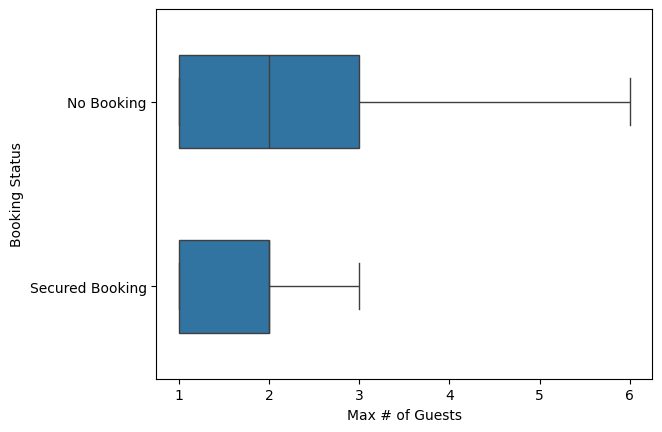

In [7]:
sns.boxplot(data=search_input,x="n_guests_max",y="ts_booking_at_dt",width=.5,showfliers=False).set(
    xlabel='Max # of Guests', 
    ylabel='Booking Status'
)

[Text(0.5, 0, 'Max # of Nights'), Text(0, 0.5, 'Booking Status')]

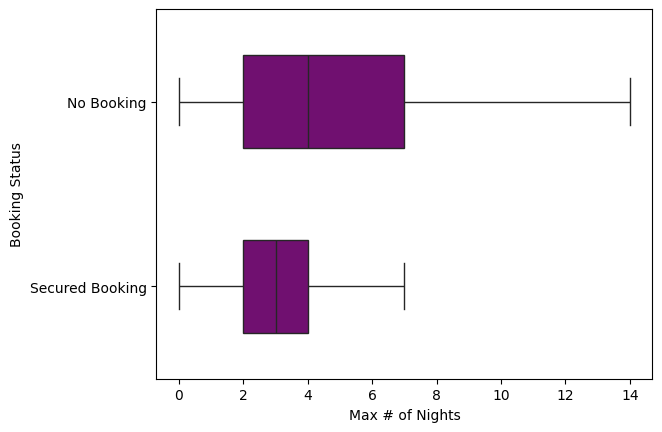

In [8]:
sns.boxplot(data=search_input,x="n_nights",y="ts_booking_at_dt", color = 'purple',width=.5,showfliers=False).set(
    xlabel='Max # of Nights', 
    ylabel='Booking Status'
)

## 3. Days Between Booking and Check-in

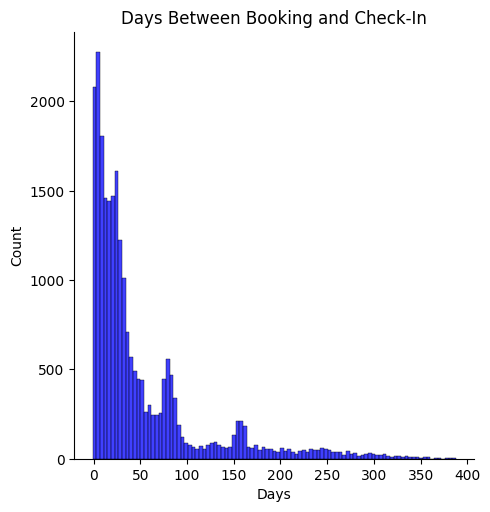

In [9]:
searches['ds_checkin'] = pd.to_datetime(searches['ds_checkin'])
searches['ds_checkout'] = pd.to_datetime(searches['ds_checkout'])
searches['ds'] = pd.to_datetime(searches['ds'])

dates = searches[['ds_checkin', 'ds_checkout', 'ds']].dropna()
dates['duration'] = dates['ds_checkout'] - dates['ds_checkin']
dates['Days'] = dates['ds_checkin'] - dates['ds']

lead_time = dates['Days'] / np.timedelta64(1, 'D')
lead_time = lead_time[lead_time < 400]
sns.displot(x=lead_time, color='blue')
plt.title('Days Between Booking and Check-In')
plt.show()

## 4. Search Counts by Neighborhood

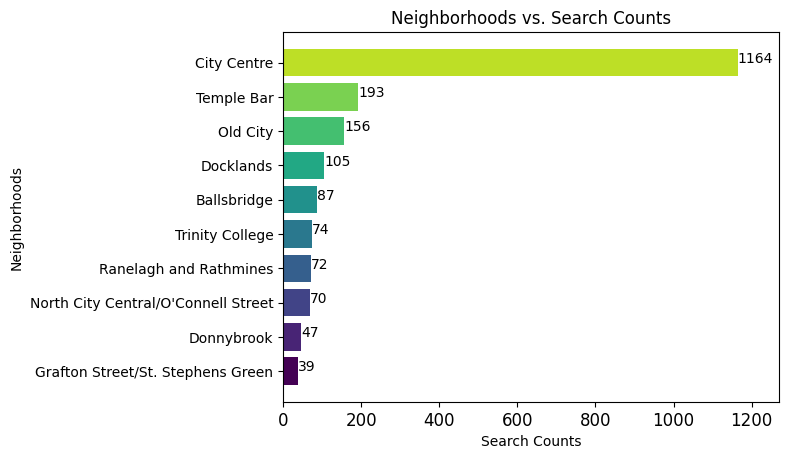

In [10]:
n_count = dict()
neighborhoods = searches[['filter_neighborhoods']].dropna()

for index,row in neighborhoods.iterrows():
    n = row['filter_neighborhoods']
    n = n.strip(',')
    n = n.split(',')
    for i in n:
        if i in n_count:
            n_count[i] += 1
        else:
            n_count[i] = 1


n_df = pd.DataFrame({
    "Location": n_count.keys(),
    "Searches" : n_count.values()
})

n_df = n_df.nlargest(10,["Searches"]).sort_values(by="Searches")
location = n_df["Location"].tolist()
count = n_df["Searches"].tolist()

colors = plt.get_cmap('viridis')
amount = len(count)
x = np.arange(amount)

for index, value in enumerate(count):
    plt.text(value, index,
             str(value))

plt.barh(location, count, tick_label=location, color=colors(x / amount))
plt.xticks(fontsize=12)
plt.title("Neighborhoods vs. Search Counts")
plt.xlabel("Search Counts")
plt.ylabel("Neighborhoods")
plt.xlim(0, 1270)
plt.show()

## 5. Prices for Most Searched Neighborhoods

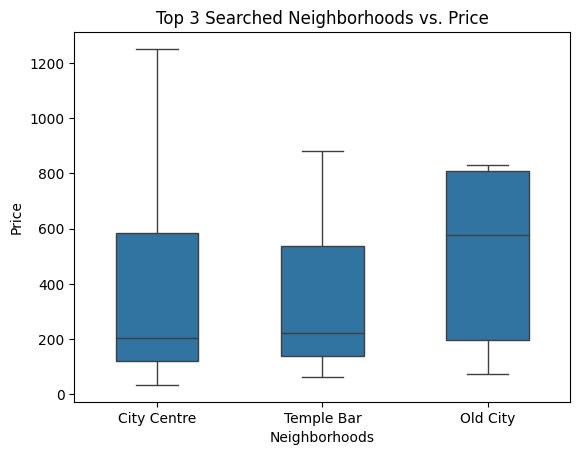

In [11]:
n_count = dict()

n_df = searches[['filter_neighborhoods']].dropna()
n_df_v2 = searches_v2[['filter_neighborhoods', 'filter_price_max']].dropna()
n_df_v2_1 = searches_v2[['filter_neighborhoods', 'filter_price_max']].dropna()

for index,row in neighborhoods.iterrows():
    n = row['filter_neighborhoods']
    n = n.strip(',')
    n = n.split(',')
    for i in n:
        if i in n_count:
            n_count[i] += 1
        else:
            n_count[i] = 1


n_df = pd.DataFrame({
    "Location": n_count.keys(),
    "Searches" : n_count.values()
})

n_df_top10 = n_df.nlargest(10,["Searches"]).sort_values(by="Searches")
n_df_high = n_df.nlargest(3,["Searches"]).sort_values(by="Searches")
n_df_low = n_df_top10.nsmallest(3,["Searches"]).sort_values(by="Searches")

n_df_v2 = n_df_v2[(n_df_v2['filter_neighborhoods'] == n_df_high.iloc[0,0]) | 
                 (n_df_v2['filter_neighborhoods'] == n_df_high.iloc[1,0]) | 
                 (n_df_v2['filter_neighborhoods'] == n_df_high.iloc[2,0])]

n_df_v2.reset_index(drop=True, inplace=True)

sns.boxplot(data=n_df_v2, x="filter_neighborhoods", y="filter_price_max", width=0.5, showfliers=False)
plt.xlabel('Neighborhoods')
plt.ylabel('Price')
plt.title('Top 3 Searched Neighborhoods vs. Price')
plt.show()

## 6. Density of Check-Ins Calendar

<Axes: title={'center': 'DAY VS. MONTH: # OF CHECK INS'}, xlabel='month', ylabel='day'>

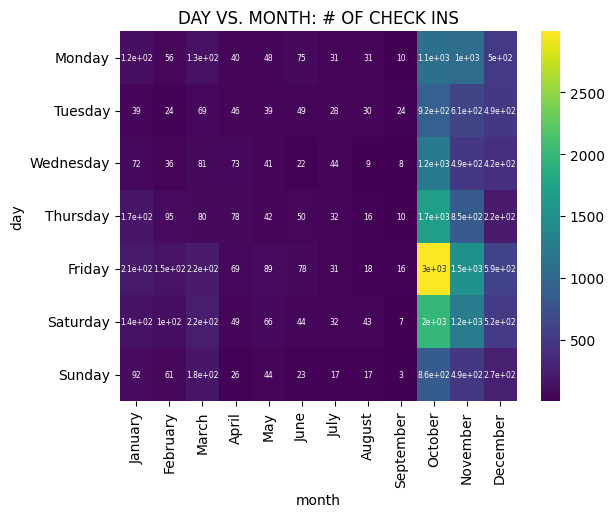

In [12]:
def check_weekday_or_weekend(date):
    given_date = datetime.datetime.strptime(date, '%Y-%m-%d')
    day_of_week = (given_date.weekday() + 1) % 7 

    if day_of_week == 0:
        day_word = 'Sunday'
    elif day_of_week == 1:
        day_word = 'Monday'
    elif day_of_week == 2:
        day_word = 'Tuesday'
    elif day_of_week == 3:
        day_word = 'Wednesday'
    elif day_of_week == 4:
        day_word = 'Thursday'
    elif day_of_week == 5:
        day_word = 'Friday'
    elif day_of_week == 6:
        day_word = 'Saturday'

    return day_word

def check_month(date):
    date = date.split('-')
    month = int(date[1])
    return calendar.month_name[month]


days_dict = dict()

for i in searches_v2['ds_checkin_date'].dropna():
    day = check_weekday_or_weekend(i)
    month = check_month(i)
    if (day,month) in days_dict:
        days_dict[(day,month)] += 1
    else:
        days_dict[(day,month)] = 1

days_data = pd.DataFrame(list(days_dict.items()), columns=['(x, y)', 'count'])
days_data[['day', 'month']] = pd.DataFrame(days_data['(x, y)'].tolist(), index=days_data.index)
days_data.drop('(x, y)', axis=1, inplace=True)

days_data['day'] = pd.Categorical(days_data['day'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
days_data['month'] = pd.Categorical(days_data['month'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)

plt.title('DAY VS. MONTH: # OF CHECK INS')
grid = days_data.pivot(index='day', columns='month', values='count')
sns.heatmap(grid, annot=True, annot_kws={'size': 5.5}, cmap='viridis')

## 7. Room Types

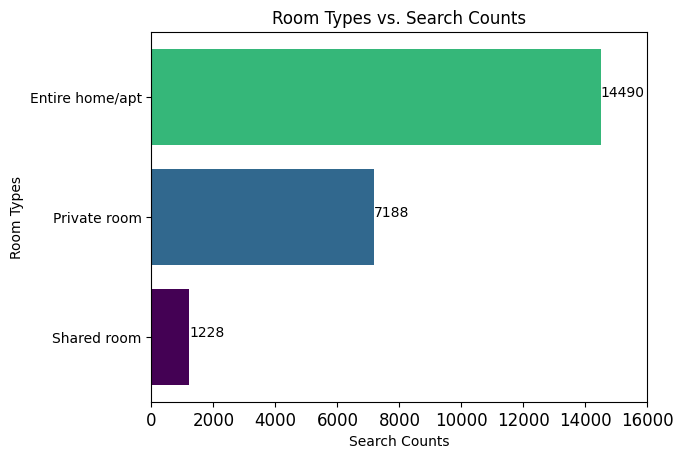

In [13]:
n_count = dict()
rooms = searches[['filter_room_types']].dropna()

for index,row in rooms.iterrows():
    n = row['filter_room_types']
    n = n.strip(',')
    n = n.split(',')
    for i in n:
        if i in n_count:
            n_count[i] += 1
        else:
            n_count[i] = 1

n_df = pd.DataFrame({
    "Location": n_count.keys(),
    "Searches" : n_count.values()
})

n_df = n_df.nlargest(10,["Searches"]).sort_values(by="Searches")
location = n_df["Location"].tolist()
count = n_df["Searches"].tolist()

colors = plt.get_cmap('viridis')
amount = len(count)
x = np.arange(amount)

plt.barh(location, count, tick_label=location, color=colors(x / amount))

for index, value in enumerate(count):
    plt.text(value, index,
             str(value))

plt.xticks(fontsize=12)
plt.title("Room Types vs. Search Counts")
plt.xlabel("Search Counts")
plt.ylabel("Room Types")
plt.xlim(0, 16000)
plt.show()

## 8. Price Preferences

In [14]:
display(searches.describe())

,ds,ds_checkin,ds_checkout,n_searches,n_nights,n_guests_min,n_guests_max,filter_price_min,filter_price_max
count,35737,23888,23888,35737.000000,23888.000000,35737.000000,35737.000000,13322.000000,1.332200e+04
mean,2014-10-07 14:32:34.478551552,2014-11-27 22:42:10.609511168,2014-12-05 14:50:57.468184832,9.206565,7.672765,1.742955,2.105857,8.470200,9.019063e+07
min,2014-10-01 00:00:00,2014-10-01 00:00:00,2014-10-02 00:00:00,1.000000,0.000000,1.000000,1.000000,0.000000,9.000000e+00
25%,2014-10-04 00:00:00,2014-10-17 00:00:00,2014-10-23 00:00:00,1.000000,2.000000,1.000000,1.000000,0.000000,8.600000e+01
50%,2014-10-08 00:00:00,2014-11-03 00:00:00,2014-11-09 00:00:00,4.000000,3.000000,1.000000,2.000000,0.000000,1.390000e+02
75%,2014-10-11 00:00:00,2014-12-13 00:00:00,2014-12-24 00:00:00,10.000000,5.000000,2.000000,2.000000,0.000000,3.010000e+02
max,2014-10-14 00:00:00,2016-06-02 00:00:00,2016-08-17 00:00:00,448.000000,399.000000,16.000000,16.000000,1250.000000,1.073742e+09
std,NaN,NaN,NaN,17.348746,21.557614,1.460440,1.817358,53.987679,2.978482e+08


In [15]:
display(searches.skew(axis=0, numeric_only=True, skipna=True))

n_searches           7.509258
n_nights             9.942364
n_guests_min         3.583798
n_guests_max         3.148548
filter_price_min    11.087745
filter_price_max     2.999833
dtype: float64

/var/folders/gy/bj1c9cj1435dy1g737vyx1yh0000gn/T/ipykernel_14824/702654108.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  max_prices['Price'] = max_prices['filter_price_max']


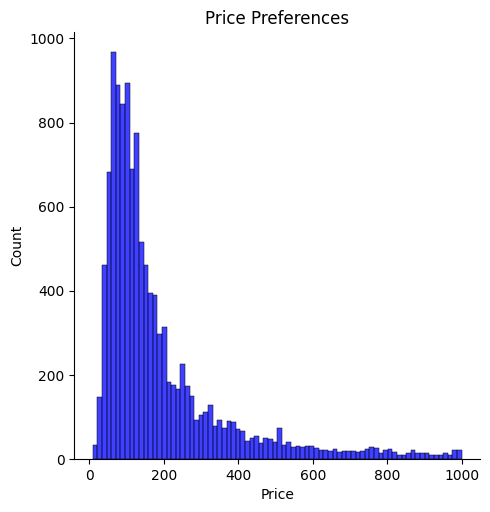

In [16]:
max_prices = searches[searches['filter_price_max'] < 1000]
max_prices['Price'] = max_prices['filter_price_max']
sns.displot(x=max_prices['Price'], color='blue')
plt.title('Price Preferences')
plt.show()

## 9. Acceptance Rates for Guest Sizes

In [18]:
contacts['ts_contact_at'] = pd.to_datetime(contacts['ts_contact_at'])
contacts['ts_reply_at'] = pd.to_datetime(contacts['ts_reply_at'])
contacts['ts_accepted_at'] = pd.to_datetime(contacts['ts_accepted_at'])
contacts['ts_booking_at'] = pd.to_datetime(contacts['ts_booking_at'])
contacts['ds_checkin'] = pd.to_datetime(contacts['ds_checkin'])
contacts['ds_checkout'] = pd.to_datetime(contacts['ds_checkout'])
contacts['length_stay'] = contacts['ds_checkout'] - contacts['ds_checkin']
contacts['accepted'] = np.where(np.isnan(contacts['ts_accepted_at']), False, True)

display(contacts.dtypes)
display(contacts.describe())

id_guest                   object
id_host                    object
id_listing                 object
ts_contact_at      datetime64[ns]
ts_reply_at        datetime64[ns]
ts_accepted_at     datetime64[ns]
ts_booking_at      datetime64[ns]
ds_checkin         datetime64[ns]
ds_checkout        datetime64[ns]
n_guests                    int64
n_messages                  int64
length_stay       timedelta64[ns]
accepted                     bool
dtype: object

,ts_contact_at,ts_reply_at,ts_accepted_at,ts_booking_at,ds_checkin,ds_checkout,n_guests,n_messages,length_stay
count,7823,7219,3627,2174,7823,7823,7823.000000,7823.000000,7823
mean,2014-10-10 11:59:33.640802816,2014-10-10 22:42:36.511982336,2014-10-11 14:07:07.993382912,2014-10-13 07:54:43.307267840,2014-11-16 09:47:00.452511744,2014-11-22 05:12:33.317141760,2.422600,6.319954,5 days 19:25:32.864629937
min,2014-03-04 11:08:13,2014-04-18 09:39:06,2014-05-21 16:51:54,2014-05-21 16:51:54,2014-10-01 00:00:00,2014-10-02 00:00:00,1.000000,1.000000,1 days 00:00:00
25%,2014-10-03 16:28:52,2014-10-03 23:07:32,2014-10-04 13:45:13,2014-10-05 13:53:46,2014-10-15 00:00:00,2014-10-19 00:00:00,1.000000,2.000000,2 days 00:00:00
50%,2014-10-08 17:34:36,2014-10-09 00:16:21,2014-10-09 13:46:50,2014-10-10 11:15:13,2014-10-31 00:00:00,2014-11-06 00:00:00,2.000000,4.000000,3 days 00:00:00
75%,2014-10-13 21:28:51.500000,2014-10-14 10:00:04.500000,2014-10-14 16:28:27.500000,2014-10-15 13:16:17.249999872,2014-11-22 00:00:00,2014-11-30 00:00:00,3.000000,8.000000,5 days 00:00:00
max,2015-02-02 08:45:18,2015-02-02 23:18:25,2015-02-03 14:16:42,2015-01-21 16:16:29,2015-10-24 00:00:00,2015-12-01 00:00:00,16.000000,102.000000,334 days 00:00:00
std,NaN,NaN,NaN,NaN,NaN,NaN,1.617347,6.472827,14 days 23:45:24.447710564


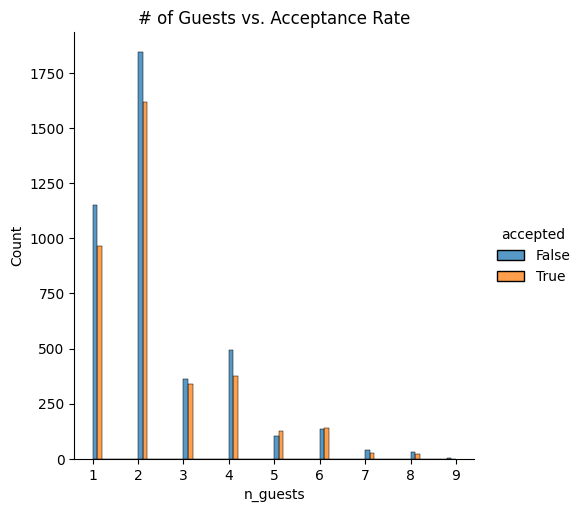

In [19]:
sns.displot(contacts[contacts['n_guests'] < 10], x='n_guests', hue='accepted', multiple='dodge')
plt.title('# of Guests vs. Acceptance Rate')
plt.show()

In [20]:
merged_datasets = contacts.merge(searches_v2, left_on='id_guest', right_on='id_user')

def label_price (row):
    if (row['filter_price_max'] >= 0) & (row['filter_price_max'] < 100):
        return '0-100'
    elif (row['filter_price_max'] >= 100) & (row['filter_price_max'] < 200):
        return '100-200'
    elif (row['filter_price_max'] >= 200) & (row['filter_price_max'] < 300):
        return '200-300'
    elif (row['filter_price_max'] >= 300) & (row['filter_price_max'] < 400):
        return '300-400'
    elif (row['filter_price_max'] >= 400) & (row['filter_price_max'] < 500):
        return '400-500'
    elif (row['filter_price_max'] >= 500) & (row['filter_price_max'] < 600):
        return '500-600'
    else:
        return '600+'

merged_datasets['classification_max_price'] = merged_datasets.apply(lambda row: label_price(row), axis=1)
merged_datasets.groupby(['ds','ds_checkin','classification_max_price'],as_index=False).agg({'accepted': 'mean','id_guest':'count'})

,ds,ds_checkin,classification_max_price,accepted,id_guest
0,2014-10-01,2014-10-01,0-100,0.500000,2
1,2014-10-01,2014-10-01,100-200,0.272727,11
2,2014-10-01,2014-10-01,200-300,0.000000,4
3,2014-10-01,2014-10-01,500-600,0.000000,4
4,2014-10-01,2014-10-01,600+,0.260870,23
...,...,...,...,...,...
3473,2014-10-14,2015-07-19,600+,1.000000,2
3474,2014-10-14,2015-08-01,600+,0.000000,1
3475,2014-10-14,2015-09-15,600+,0.333333,6
3476,2014-10-14,2015-09-24,0-100,0.000000,2


In [21]:
merged_datasets

,id_guest,id_host,id_listing,ts_contact_at,ts_reply_at,ts_accepted_at,ts_booking_at,ds_checkin,ds_checkout,n_guests,...,n_nights,n_guests_min,n_guests_max,origin_country,filter_price_min,filter_price_max,filter_room_types,filter_neighborhoods,Price-Range,classification_max_price
0,000dfad9-459b-4f0b-8310-3d6ab34e4f57,13bb24b8-d432-43a2-9755-5ea11b43bb69,21d2b1a2-fdc3-4b4c-a1f0-0eaf0cc02370,2014-10-04 16:26:28,2014-10-04 16:26:28,2014-10-04 16:26:28,2014-10-04 16:26:28,2014-10-13,2014-10-15,2,...,2.0,2,2,CA,0.0,130.0,Entire home/apt,NaN,0-130,100-200
1,00197051-c6cb-4c3a-99e9-86615b819874,46aa3897-9c00-4d76-ac66-a307593d0675,fb5ed09a-9848-4f2c-b2ef-34deb62164fb,2014-11-04 09:10:03,2014-11-04 09:45:50,2014-11-04 09:45:50,2014-11-04 12:20:46,2014-11-27,2014-11-30,1,...,3.0,1,1,DK,0.0,336.0,"Entire home/apt,Private room,Private room",NaN,0-336,300-400
2,0027538e-aa9e-4a02-8979-b8397e5d4cba,6bbb88ca-db66-48c5-9c4b-862f7706284a,d3871da6-8012-4dc4-b508-c91f2c10c297,2014-10-10 12:02:50,2014-10-10 15:07:01,NaT,NaT,2014-10-17,2014-10-19,2,...,2.0,2,2,CY,0.0,1258.0,"Entire home/apt,Entire home/apt,Private room,P...",NaN,0-1258,600+
3,0027538e-aa9e-4a02-8979-b8397e5d4cba,6bbb88ca-db66-48c5-9c4b-862f7706284a,d3871da6-8012-4dc4-b508-c91f2c10c297,2014-10-10 12:02:50,2014-10-10 15:07:01,NaT,NaT,2014-10-17,2014-10-19,2,...,2.0,2,2,CY,0.0,214.0,Entire home/apt,NaN,0-214,200-300
4,0027538e-aa9e-4a02-8979-b8397e5d4cba,8772bc85-a9b7-4d85-a52d-41f3620c2912,0d9b5583-8053-4b67-adfe-8c29eb12efed,2014-10-10 15:23:53,NaT,NaT,NaT,2014-10-17,2014-10-19,2,...,2.0,2,2,CY,0.0,1258.0,"Entire home/apt,Entire home/apt,Private room,P...",NaN,0-1258,600+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28531,ffe366f0-6ab6-4e94-818a-c69c125fed3c,f86bc9ab-e199-4254-8609-fd67d6aaed42,28caf371-6d1d-4e06-aaf1-e660966ac7a1,2014-10-07 21:30:31,2014-10-08 19:04:43,NaT,NaT,2014-10-17,2014-10-20,2,...,3.0,2,2,IT,0.0,105.0,NaN,NaN,0-105,100-200
28532,fffea166-9432-43a7-8b1b-09d6f30c1c07,6d656267-642e-4972-bdec-a35d82b84ebb,90dddef6-23ef-4df3-b454-8fd3d0e8cade,2014-10-08 00:05:05,2014-10-12 20:58:12,NaT,NaT,2014-11-11,2014-11-18,2,...,30.0,1,2,AR,NaN,NaN,NaN,NaN,-,600+
28533,fffea166-9432-43a7-8b1b-09d6f30c1c07,6d656267-642e-4972-bdec-a35d82b84ebb,90dddef6-23ef-4df3-b454-8fd3d0e8cade,2014-10-08 00:05:05,2014-10-12 20:58:12,NaT,NaT,2014-11-11,2014-11-18,2,...,6.0,2,2,AR,0.0,170.0,NaN,NaN,0-170,100-200
28534,fffea166-9432-43a7-8b1b-09d6f30c1c07,6d656267-642e-4972-bdec-a35d82b84ebb,90dddef6-23ef-4df3-b454-8fd3d0e8cade,2014-10-08 00:05:05,2014-10-12 20:58:12,NaT,NaT,2014-11-11,2014-11-18,2,...,6.0,2,2,AR,0.0,34.0,NaN,NaN,0-34,0-100


## 10. Country Map

In [22]:
merged_datasets["accepted"]
dataset_country = merged_datasets[['origin_country', 'accepted']]

accepted_count = dataset_country.groupby(['origin_country', 'accepted']).agg({'origin_country':'count'})
accepted_count.columns = ['count_accepted']

country_count = dataset_country.groupby(['origin_country']).agg({'origin_country':'count'})
country_count.columns = ['count_country']

acceptance_country = pd.merge(dataset_country, accepted_count,  how='left', on=['origin_country','accepted'])
acceptance_country = acceptance_country.drop_duplicates()

acceptance_country = pd.merge(acceptance_country, country_count, how='left', on=['origin_country'])
acceptance_country = acceptance_country.sort_values(['count_country', 'accepted'], ascending = [False, True])
acceptance_country = acceptance_country[acceptance_country['count_country'] >= 100]
acceptance_country = acceptance_country[acceptance_country['accepted'] == True]

acceptance_country['acceptance_rate'] = acceptance_country['count_accepted']/acceptance_country['count_country']
acceptance_country.sort_values(['acceptance_rate'], ascending = True)

,origin_country,accepted,count_accepted,count_country,acceptance_rate
73,IN,True,138,874,0.157895
55,HR,True,159,530,0.300000
72,AT,True,83,239,0.347280
54,RU,True,83,239,0.347280
11,IT,True,1183,3137,0.377112
100,AE,True,59,154,0.383117
0,CA,True,407,993,0.409869
13,IE,True,1217,2951,0.412403
24,ES,True,794,1914,0.414838
49,RO,True,50,118,0.423729


Dhekelia Sovereign Base Area not found in regex
US Naval Base Guantanamo Bay not found in regex
Siachen Glacier not found in regex
Baykonur Cosmodrome not found in regex
Akrotiri Sovereign Base Area not found in regex
Southern Patagonian Ice Field not found in regex
Bir Tawil not found in regex
Indian Ocean Territories not found in regex
Coral Sea Islands not found in regex
Spratly Islands not found in regex
Clipperton Island not found in regex
Ashmore and Cartier Islands not found in regex
Bajo Nuevo Bank (Petrel Is.) not found in regex
Serranilla Bank not found in regex
Scarborough Reef not found in regex


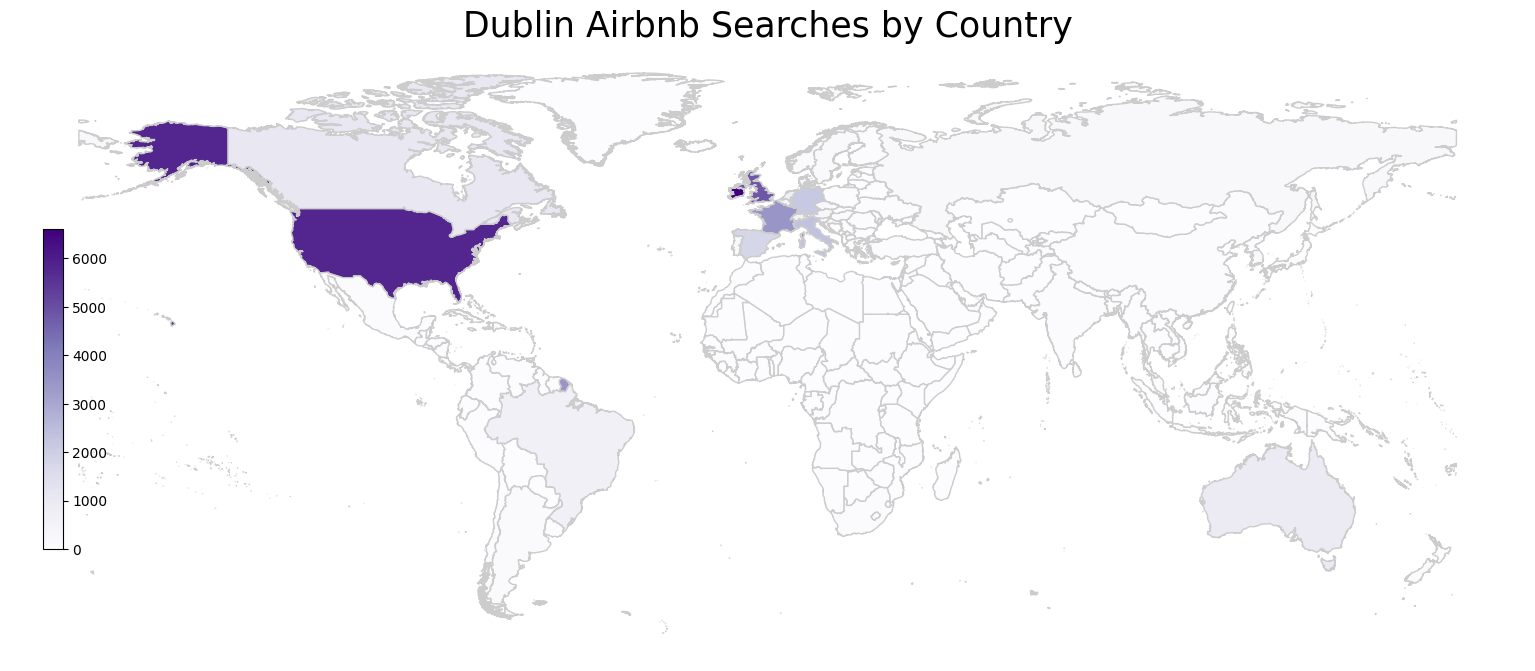

In [35]:
countries = searches[['origin_country']]
countries_dict = {}

for index,row in countries.iterrows():
    country = row['origin_country']
    if country in countries_dict:
        countries_dict[country] += 1
    else:
        countries_dict[country] = 1

country_keys = countries_dict.keys()
country_values = countries_dict.values()
heatmap_data = {
    'origin_country': country_keys,
    'Count': country_values
}
countries_df = pd.DataFrame(heatmap_data)

SHAPEFILE = "data/countries.shp"
geo_df = gpd.read_file(SHAPEFILE)[['ADMIN', 'ADM0_A3', 'geometry']]
geo_df.columns = ['country', 'country_code', 'geometry']
geo_df = geo_df.drop(geo_df.loc[geo_df['country'] == 'Antarctica'].index)
iso3_codes = geo_df['country'].to_list()
iso2_codes_list = coco.convert(names=iso3_codes, to='ISO2', not_found='NULL')
geo_df['iso2_code'] = iso2_codes_list
geo_df = geo_df.drop(geo_df.loc[geo_df['iso2_code'] == 'NULL'].index)
merged_df = pd.merge(left=geo_df, right=countries_df, how='left', left_on='iso2_code', right_on='origin_country')
merged_df = merged_df.drop(['origin_country'], axis=1)
merged_df['Count'] = merged_df['Count'].fillna(0)
vmin = merged_df['Count'].min()
vmax = merged_df['Count'].max()
fig, ax = plt.subplots(1, figsize=(20, 8))
ax.axis('off')
merged_df.plot(column='Count', ax=ax, edgecolor='0.8', linewidth=1, cmap='Purples')
ax.set_title('Dublin Airbnb Searches by Country', fontdict={'fontsize': '25', 'fontweight': '3'})
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap='Purples')
sm._A = []
cbaxes = fig.add_axes([0.15, 0.25, 0.01, 0.4])
cbar = fig.colorbar(sm, cax=cbaxes)

Dhekelia Sovereign Base Area not found in regex
US Naval Base Guantanamo Bay not found in regex
Siachen Glacier not found in regex
Baykonur Cosmodrome not found in regex
Akrotiri Sovereign Base Area not found in regex
Southern Patagonian Ice Field not found in regex
Bir Tawil not found in regex
Indian Ocean Territories not found in regex
Coral Sea Islands not found in regex
Spratly Islands not found in regex
Clipperton Island not found in regex
Ashmore and Cartier Islands not found in regex
Bajo Nuevo Bank (Petrel Is.) not found in regex
Serranilla Bank not found in regex
Scarborough Reef not found in regex


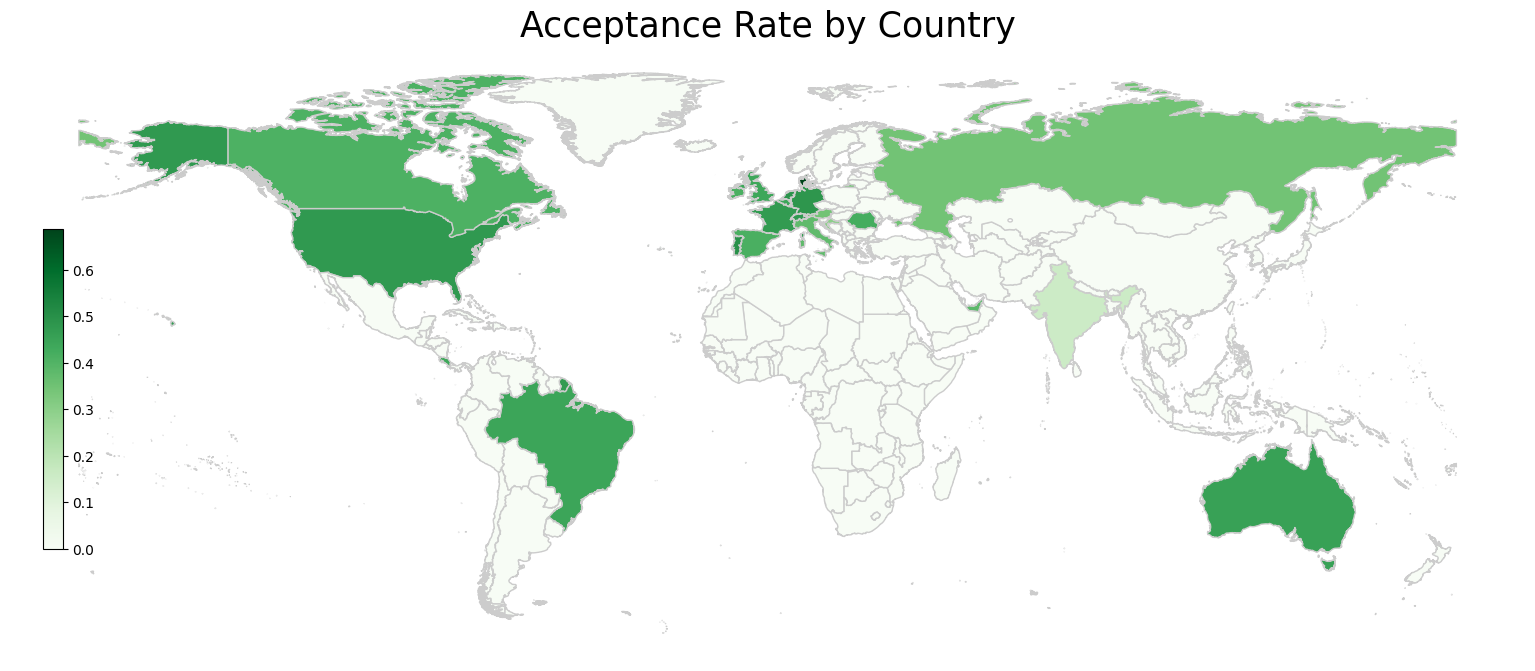

In [41]:
countries_df = acceptance_country[['origin_country', 'acceptance_rate']]

SHAPEFILE = 'data/countries.shp'
geo_df = gpd.read_file(SHAPEFILE)[['ADMIN', 'ADM0_A3', 'geometry']]
geo_df.columns = ['country', 'country_code', 'geometry']
geo_df = geo_df.drop(geo_df.loc[geo_df['country'] == 'Antarctica'].index)
iso3_codes = geo_df['country'].to_list()
iso2_codes_list = coco.convert(names=iso3_codes, to='ISO2', not_found='NULL')
geo_df['iso2_code'] = iso2_codes_list
geo_df = geo_df.drop(geo_df.loc[geo_df['iso2_code'] == 'NULL'].index)
merged_df = pd.merge(left=geo_df, right=countries_df, how='left', left_on='iso2_code', right_on='origin_country')
merged_df = merged_df.drop(['origin_country'], axis=1)
merged_df['acceptance_rate'] = merged_df['acceptance_rate'].fillna(0)
vmin = merged_df['acceptance_rate'].min()
vmax = merged_df['acceptance_rate'].max()
fig, ax = plt.subplots(1, figsize=(20, 8))
ax.axis('off')
merged_df.plot(column='acceptance_rate', ax=ax, edgecolor='0.8', linewidth=1, cmap='Greens')
ax.set_title('Acceptance Rate by Country', fontdict={'fontsize': '25', 'fontweight': '3'})
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap='Greens')
sm._A = []
cbaxes = fig.add_axes([0.15, 0.25, 0.01, 0.4])
cbar = fig.colorbar(sm, cax=cbaxes)

## 11. Success of Bookings

In [46]:
label_encoder = LabelEncoder()
features = contacts[['id_host', 'id_listing', 'ts_contact_at', 'ds_checkin', 'ds_checkout', 'n_guests', 'n_messages']]
targets = contacts['ts_booking_at'].notnull().astype(int)
features['id_host'] = label_encoder.fit_transform(features['id_host'])
features['id_listing'] = label_encoder.fit_transform(features['id_listing'])

features['ts_contact_at'] = pd.to_datetime(features['ts_contact_at'])
features['ts_contact_at_year'] = features['ts_contact_at'].dt.year
features['ts_contact_at_month'] = features['ts_contact_at'].dt.month
features['ts_contact_at_day'] = features['ts_contact_at'].dt.day
features['ts_contact_at_hour'] = features['ts_contact_at'].dt.hour
features['ts_contact_at_min ute'] = features['ts_contact_at'].dt.minute
features['ts_contact_at_day_of_week'] = features['ts_contact_at'].dt.day_of_week
features['ts_contact_at_quarter'] = features['ts_contact_at'].dt.quarter
features.drop(columns=['ts_contact_at'], inplace=True)

features['ds_checkin'] = pd.to_datetime(features['ds_checkin'])
features['ds_checkout'] = pd.to_datetime(features['ds_checkout'])
features['ds_duration'] = features['ds_checkout'] - features['ds_checkin']
features['ds_duration'] = features['ds_duration'].dt.days

features['ds_checkin_year'] = features['ds_checkin'].dt.year
features['ds_checkin_month'] = features['ds_checkin'].dt.month
features['ds_checkin_day'] = features['ds_checkin'].dt.day
features['ds_checkin_day_of_week'] = features['ds_checkin'].dt.day_of_week
features['ds_checkin_quarter'] = features['ds_checkin'].dt.quarter
features.drop(columns=['ds_checkin'], inplace=True)

features['ds_checkout_year'] = features['ds_checkout'].dt.year
features['ds_checkout_month'] = features['ds_checkout'].dt.month
features['ds_checkout_day'] = features['ds_checkout'].dt.day
features['ds_checkout_day_of_week'] = features['ds_checkout'].dt.day_of_week
features['ds_checkout_quarter'] = features['ds_checkout'].dt.quarter
features.drop(columns=['ds_checkout'], inplace=True)

X_tr, X_te, y_tr, y_te = train_test_split(features, targets, test_size=0.2, random_state=0)
X_tr.fillna(-1, inplace=True)
X_te.fillna(-1, inplace=True)

scaler = StandardScaler()
X_tr_scaled = scaler.fit_transform(X_tr)
X_te_scaled = scaler.fit_transform(X_te)

model = LogisticRegression()
model.fit(X_tr_scaled, y_tr)

y_pred = model.predict(X_te_scaled)

accuracy = accuracy_score(y_te, y_pred)
print("Accuracy: ", accuracy)
print("Classification Report:")
print(classification_report(y_te, y_pred))

Accuracy:  0.8619808306709266
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1116
           1       0.86      0.62      0.72       449

    accuracy                           0.86      1565
   macro avg       0.86      0.79      0.81      1565
weighted avg       0.86      0.86      0.85      1565



/var/folders/gy/bj1c9cj1435dy1g737vyx1yh0000gn/T/ipykernel_14824/3931006075.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['id_host'] = label_encoder.fit_transform(features['id_host'])
/var/folders/gy/bj1c9cj1435dy1g737vyx1yh0000gn/T/ipykernel_14824/3931006075.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['id_listing'] = label_encoder.fit_transform(features['id_listing'])
/var/folders/gy/bj1c9cj1435dy1g737vyx1yh0000gn/T/ipykernel_14824/3931006075.py:7: SettingWithCopyWarning: 
A

theta_0=-1.0466503508140543, theta_1=-0.16712554867123375, theta_2=-0.8568436729065224


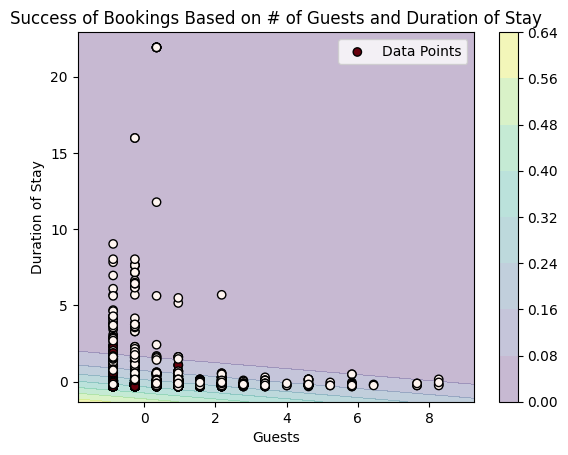

In [48]:
def sigmoid(z):
    if isinstance(z, np.ndarray):
        return 1 / (1 + np.exp(-z))
    else:
        return 1 / (1 + math.exp(-z))

def logistic_prob(theta_0, theta_1, theta_2, x_1, x_2):
    logit = theta_0 + theta_1 * x_1 + theta_2 * x_2
    prob_y1 = sigmoid(logit)

    return prob_y1

def logistic_loss(theta_0, theta_1, theta_2, x_1, x_2, y):
    prob_y1 = logistic_prob(theta_0, theta_1, theta_2, x_1, x_2)
    cross_entropy = -np.mean(y * np.log(prob_y1) + (1-y) * np.log(1 - prob_y1))

    return cross_entropy

def plot_boundary_w_intercept(theta_0, theta_1, theta_2, x_1, x_2, y):
    fig, axes = plt.subplots()
    x1_min, x1_max = x_1.min() - 1, x_1.max() + 1
    x2_min, x2_max = x_2.min() - 1, x_2.max() + 1
    X1 = np.linspace(x1_min, x1_max, 100)
    X2 = np.linspace(x2_min, x2_max, 100)

    X1, X2 = np.meshgrid(X1, X2)
    datapoints = np.c_[X1.ravel(), X2.ravel()]

    decision_boundary = logistic_prob(theta_0, theta_1, theta_2, datapoints[:, 0], datapoints[:, 1])
    decision_boundary = decision_boundary.reshape(X1.shape)

    contours = axes.contourf(X1, X2, decision_boundary, alpha=0.3, cmap='viridis')
    scatter = axes.scatter(x_1, x_2, c=y, cmap='Reds', edgecolors='k', marker='o', label='Data Points')

    axes.set_xlabel('Guests')
    axes.set_ylabel('Duration of Stay')
    axes.set_title('Success of Bookings Based on # of Guests and Duration of Stay')

    axes.legend()
    colorbar = plt.colorbar(contours, ax=axes)
    plt.show()

x_1 = X_tr['n_guests'].values
x_2 = X_tr['ds_duration'].values
y = (y_tr == 1).astype(int).values

std_x_1 = (x_1-x_1.mean()) / x_1.std()
std_x_2 = (x_2-x_2.mean()) / x_2.std()

loss_function = lambda thetas: logistic_loss(thetas[0], thetas[1], thetas[2], x_1=std_x_1, x_2=std_x_2, y=y)
bound = 20
initial_parameter_value = np.array([0.0, 0.0, 0.0])
r = minimize(loss_function, initial_parameter_value, bounds=[(-bound, bound) for _ in range(3)])
print("theta_0={}, theta_1={}, theta_2={}".format(*r.x))
plot_boundary_w_intercept(theta_0=r.x[0], theta_1=r.x[1], theta_2=r.x[2], x_1=std_x_1, x_2=std_x_2, y=y)

## 12. DecisionTreeClassifier Confusion Matrix

/var/folders/gy/bj1c9cj1435dy1g737vyx1yh0000gn/T/ipykernel_14824/388091242.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  search_input['ts_booking_at_dt'] = search_input['ts_booking_at_dt'].astype(int)


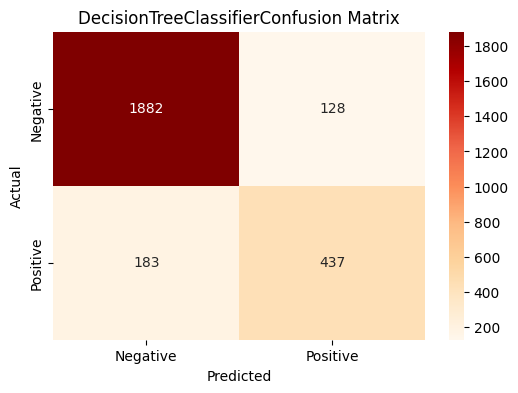


Accuracy: 0.8817490494296578
Mean Squared Error: 0.11825095057034221


In [49]:
search_input = searches_contacts[['n_nights', 'n_guests_max', 'filter_price_max', 'n_messages', 'ts_booking_at_dt']]

for i in range(len(search_input)):
    if pd.isna(search_input.loc[i, 'ts_booking_at_dt']):
        search_input.loc[i, 'ts_booking_at_dt'] = 0
    else:
        search_input.loc[i, 'ts_booking_at_dt'] = 1

search_input['ts_booking_at_dt'] = search_input['ts_booking_at_dt'].astype(int)
search_input = search_input.dropna()
search_input['filter_price_max'] = search_input['filter_price_max'].astype(int)
inputs = search_input[['n_nights', 'n_guests_max', 'filter_price_max', 'n_messages']]
outputs = search_input['ts_booking_at_dt']

X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size=0.2, random_state=42)
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="OrRd", fmt='g', 
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('DecisionTreeClassifierConfusion Matrix')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# 13. RandomForestClassifier Confusion Matrix

/var/folders/gy/bj1c9cj1435dy1g737vyx1yh0000gn/T/ipykernel_14824/2544508913.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  search_input['ts_booking_at_dt'] = search_input['ts_booking_at_dt'].astype(int)


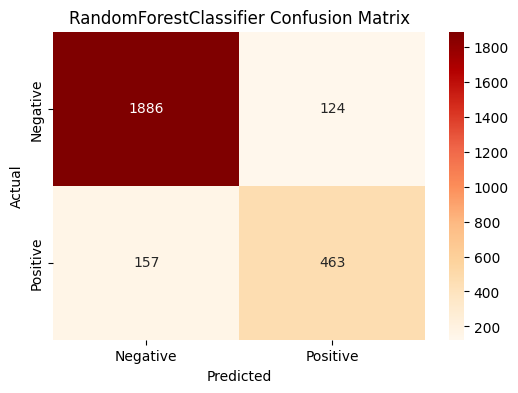


Accuracy: 0.8931558935361217
Mean Squared Error: 0.10684410646387833


In [50]:
search_input = searches_contacts[['n_nights', 'n_guests_max', 'filter_price_max', 'n_messages', 'ts_booking_at_dt']]

for i in range(len(search_input)):
    if pd.isna(search_input.loc[i, 'ts_booking_at_dt']):
        search_input.loc[i, 'ts_booking_at_dt'] = 0
    else:
        search_input.loc[i, 'ts_booking_at_dt'] = 1

search_input['ts_booking_at_dt'] = search_input['ts_booking_at_dt'].astype(int)
search_input = search_input.dropna()
search_input['filter_price_max'] = search_input['filter_price_max'].astype(int)
inputs = search_input[['n_nights', 'n_guests_max', 'filter_price_max', 'n_messages']]
outputs = search_input['ts_booking_at_dt']

X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size=0.2, random_state=42)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="OrRd", fmt='g', 
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('RandomForestClassifier Confusion Matrix')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6cced6a8-fe40-40d7-b88b-a3eb124108df' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>